<a href="https://colab.research.google.com/github/WhalepigJun/Competition_CAUST/blob/main/%EC%83%81%EA%B6%8C%EB%B3%84_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 추정 매출 data
sales2013 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2013.csv", encoding="CP949")
sales2014 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2014.csv", encoding="CP949")
sales2015 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2015.csv", encoding="CP949")
sales2016 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016.csv", encoding="CP949")
sales2017 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017.csv", encoding="CP949")
sales2018 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv", encoding="CP949")
sales2019 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv", encoding="CP949")
sales2020 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020.csv", encoding="CP949")

In [3]:
# 2013년부터 2020년 데이터 칼럼명을 동일하게 세팅 (2017년을 기준으로 맞춤)
for i in range(2013,2021):
  locals()["sales" + str(i)].columns = sales2017.columns

In [4]:
sales = pd.concat([sales2013,sales2014,sales2015,sales2016,sales2017,sales2018,sales2019,sales2020])
sales["induty_cd"] = sales["svc_induty_cd"].str[:3]

In [5]:
# 방송 점포 포함 또는 주변 전통시장, 골목상권
haebangchon = ["신흥시장","신흥로20길","소월로20길"]
seongsu = ["뚝섬로5길","상원길","성수일로6길","아차산로5길","왕십리로6길"]
seongnae = ["천호대로162길","천호옛길","천호옛14길","풍성로37가길","천호대로170길"]
hongeun = ["포방터시장"]
chungpa = ["청파로47길","청파로47나길","원효로89길","한강대로 88길","두텁바위로1길"]
hoegi = ["경희대로3길","경희대로4길","회귀시장"]
dunchon = ["천호대로187길","명일로13길","양재대로96길"]
jeongneung = ["정릉아리랑시장","정릉로26길","정릉로27길"]
hongje = ["세무서길","세무서2길"]
gongneung = ["공릉동도깨비시장", "동일로192길"]
chang = ["노해로60길","도봉로109길","도봉로114길","쌍문역골목시장"]
joonggokdong = ["긴고랑로9길","중곡제일시장","긴고랑로7길","긴고랑로8길","용마산로21길","긴고랑로20길"]

input = [haebangchon,seongsu,seongnae,hongeun,chungpa,hoegi,dunchon,jeongneung,hongje,gongneung,chang,joonggokdong]

#input = {"chungpa":chungpa, "joonggokdong":joonggokdong, "seongnae":seongnae, "chang":chang, 
#         "hoegi":hoegi, "seongsu":seongsu, "hongeun":hongeun, "dunchon":dunchon, "hongje":hongje, 
#         "jeongneung":jeongneung, "gongneung":gongneung, "haebangchon":haebangchon}

In [6]:
# 필요한 컬럼
col_ = ["stdr_yy_cd", "stdr_qu_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt","ml_selng_co", "fml_selng_amt","fml_selng_co",
        "agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt",
        "agrde_10_selng_co",	"agrde_20_selng_co",	"agrde_30_selng_co",	"agrde_40_selng_co",	"agrde_50_selng_co",	"agrde_60_above_selng_co"]

# 필요 데이터 생성 함수
def sales_by_sanggwon(area):
  rdf = sales[sales["trdar_cd_nm"].isin(area) & sales["induty_cd"].isin(["CS1","CS3"])]
  rdf = rdf.groupby(["stdr_yy_cd","stdr_qu_cd"]).sum().reset_index()[col_]
  return rdf

In [7]:
s_data = sales_by_sanggwon(input[0])
s_data["area"] = 0
for i in range(1,len(input)):
  temp = sales_by_sanggwon(input[i])
  temp["area"] = i
  s_data = pd.concat([s_data,temp])

In [8]:
s_col = ["area"] + col_

In [9]:
# 매출 data
s_data[s_col]

,area,stdr_yy_cd,stdr_qu_cd,thsmon_selng_amt,thsmon_selng_co,ml_selng_amt,ml_selng_co,fml_selng_amt,fml_selng_co,agrde_10_selng_amt,agrde_20_selng_amt,agrde_30_selng_amt,agrde_40_selng_amt,agrde_50_selng_amt,agrde_60_above_selng_amt,agrde_10_selng_co,agrde_20_selng_co,agrde_30_selng_co,agrde_40_selng_co,agrde_50_selng_co,agrde_60_above_selng_co
0,0,2013,1,3127998138,200064,1226962526,95700,1277585985,93972,13901050,400715693,675474558,525634805,477114062,411708364,2479,47867,60016,36138,25665,17526
1,0,2013,2,3727388480,241942,1508980779,115392,1536645333,114064,24704488,466468823,780737803,647348507,560499519,565867001,3711,57034,73482,45789,28373,21102
2,0,2013,3,3614149438,247829,1524339449,119654,1503242925,117618,22237961,464958362,757551947,630408786,563092650,589332695,3620,62206,72854,46457,30725,21430
3,0,2013,4,3862728770,250236,1530355017,119661,1608549613,118172,20344734,514756070,797761870,681260143,573533580,551248257,3525,62412,72934,45086,31108,22782
4,0,2014,1,3823646323,231505,1601265609,113040,1512048879,107695,16863451,462819874,822568677,683587116,604260033,523024921,2839,55027,67576,42871,30397,22036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,11,2019,2,41052631978,2556604,19428475999,1321917,19564407244,1198344,108040288,4222427985,7138817126,8628949334,11028139870,7866120331,17832,421953,606473,572606,544136,357244
26,11,2019,3,42706728631,2637681,19917592466,1363131,20777837496,1241692,113423432,4237342897,7141994980,9183807025,11889861977,8128999653,20968,454270,629373,590084,553567,356559
27,11,2019,4,32781347172,1917954,14292223163,1027991,15813713765,861006,101332875,3747298304,5405100740,6444122140,8467139310,5940943554,16936,364536,470142,420012,375851,241522
28,11,2020,1,31300255948,1863605,13906925082,997809,14899300452,841027,66442893,3044358739,5859422440,5792473066,8188958891,5855127736,12553,314256,454017,396010,392345,269655


In [10]:
s_data[s_col].to_csv("sales_by_sanggwon.csv",index=False)

In [11]:
# 추정 유동인구 data
f_pop = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정유동인구/서울시 우리마을가게 상권분석서비스(상권-추정유동인구)_2020.csv", encoding="CP949")

In [12]:
def f_pop_by_sanggwon(area):
  rdf = f_pop[f_pop["상권_코드_명"].isin(area)]
  rdf = rdf.groupby(["기준 년코드","기준_분기_코드"]).sum().reset_index()
  return rdf

In [13]:
f_pop_data = f_pop_by_sanggwon(input[0])
f_pop_data["area"] = 0
for i in range(1,len(input)):
  temp = f_pop_by_sanggwon(input[i])
  temp["area"] = i
  f_pop_data = pd.concat([f_pop_data,temp])

In [14]:
f_pop_col = ["area","기준 년코드","기준_분기_코드","총_유동인구_수","남성_유동인구_수","여성_유동인구_수","연령대_10_유동인구_수","연령대_20_유동인구_수","연령대_30_유동인구_수","연령대_40_유동인구_수","연령대_50_유동인구_수","연령대_60_이상_유동인구_수"]

In [15]:
# 유동인구 data
f_pop_data[f_pop_col]

,area,기준 년코드,기준_분기_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
0,0,2014,1,505247,269642,235603,19278,69424,139970,124043,100647,51883
1,0,2014,2,582100,310442,271657,22841,79932,157219,142613,117583,61909
2,0,2014,3,609202,325177,284026,20135,90186,165256,149551,121490,62589
3,0,2014,4,659532,348949,310577,24511,112338,174115,157183,126501,64878
4,0,2015,1,531839,281609,250230,13123,88868,141520,129530,104273,54524
...,...,...,...,...,...,...,...,...,...,...,...,...
21,11,2019,2,4582052,2141403,2440650,628028,632794,777333,694526,762981,1086389
22,11,2019,3,4351124,2034377,2316745,604884,601318,736868,652873,725369,1029817
23,11,2019,4,4574805,2130441,2444362,640769,631889,779096,682903,762319,1077831
24,11,2020,1,4758791,2211025,2547763,680764,684273,815822,707979,765150,1104804


In [16]:
f_pop_data[f_pop_col].to_csv("f_pop_by_sanggwon.csv",index=False)

In [17]:
bd = [22,22,23,23,23,24,26,27,28,28,30,30]
name = ["haebangchon","seongsu","seongnae","hongeun","chungpa","hoegi","dunchon",
         "jeongneung","hongje","gongneung","chang","joonggokdong"]

# 매출 금액

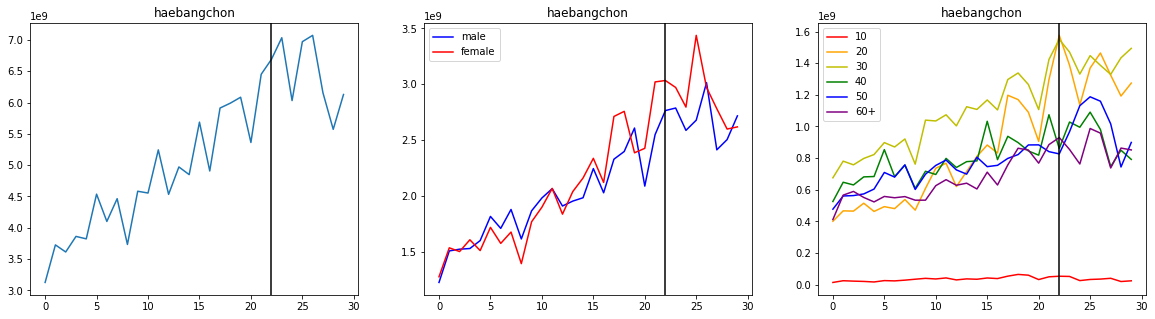

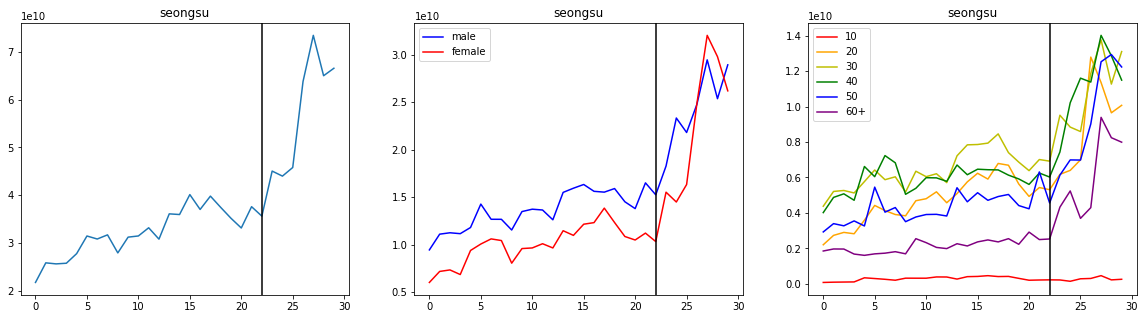

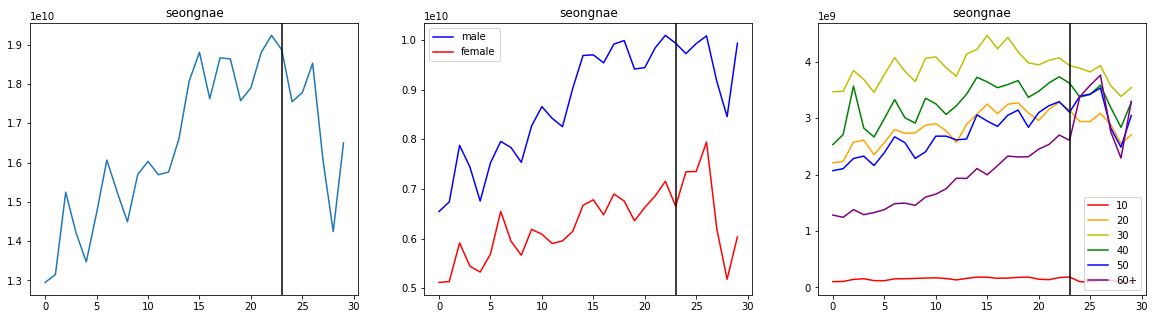

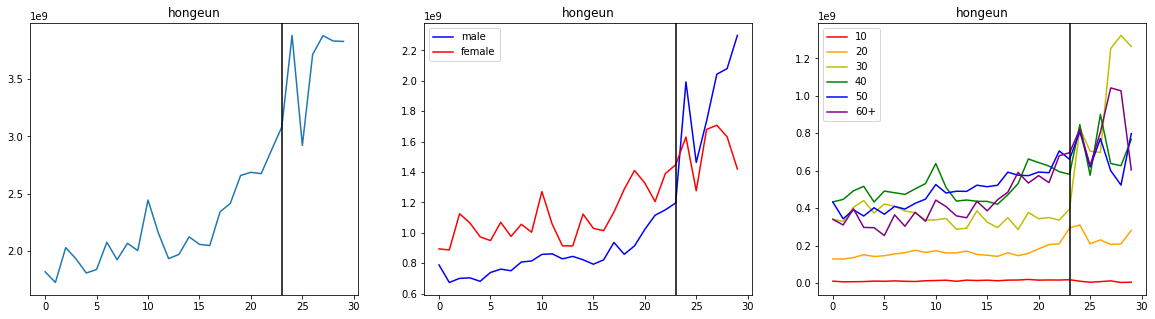

In [18]:
for i in range(4):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_amt)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])

  axes[1].plot(temp.ml_selng_amt, label="male", color='b')
  axes[1].plot(temp.fml_selng_amt, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_amt, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_amt, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_amt, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_amt, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_amt, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_amt, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()


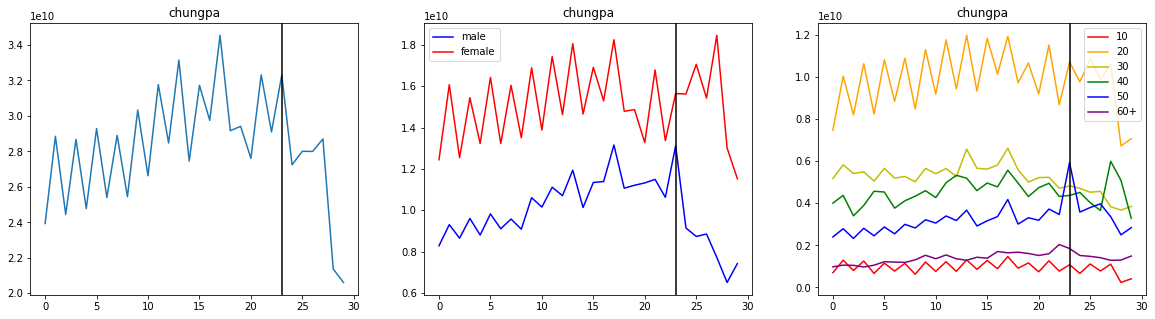

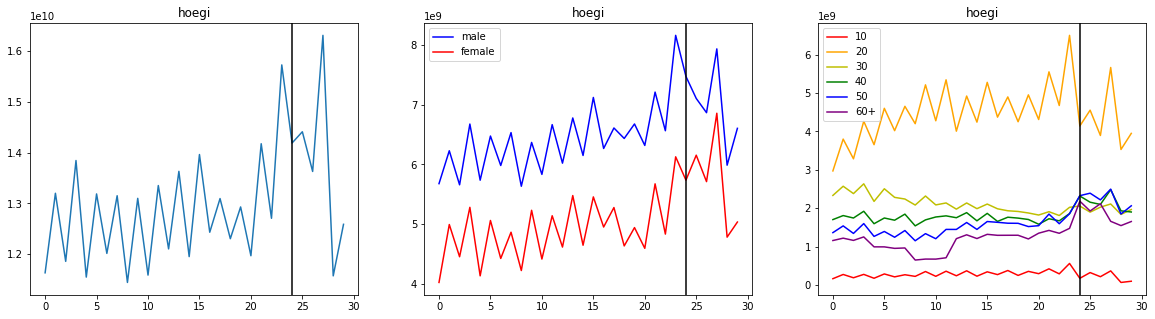

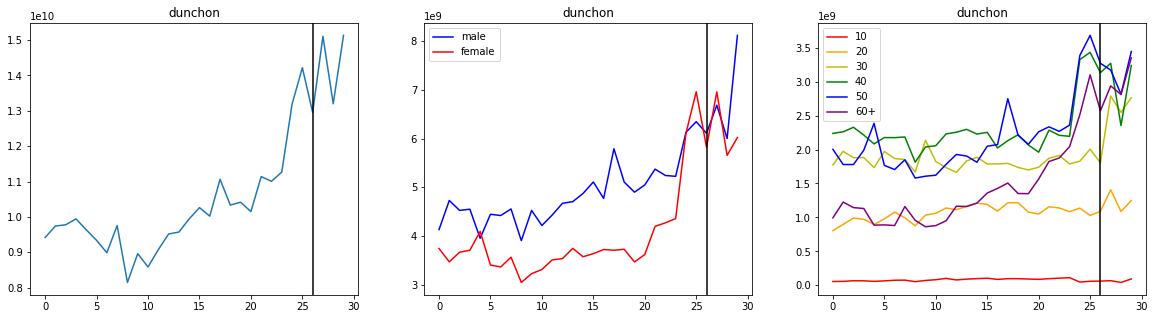

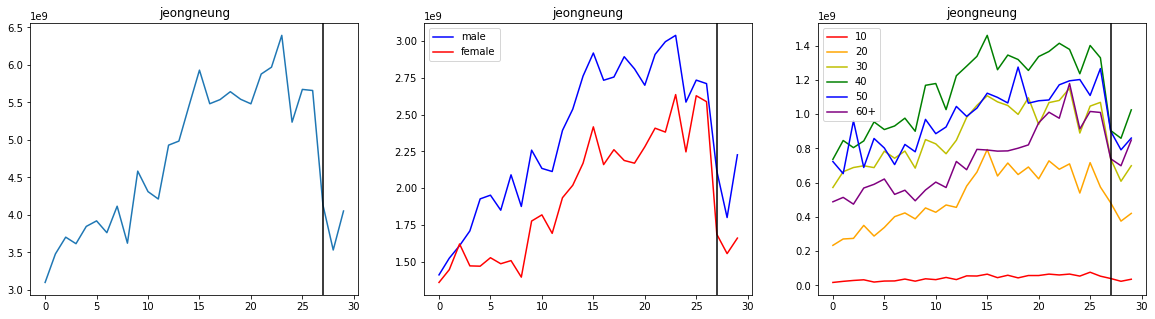

In [19]:
for i in range(4,8):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_amt)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])

  axes[1].plot(temp.ml_selng_amt, label="male", color='b')
  axes[1].plot(temp.fml_selng_amt, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_amt, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_amt, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_amt, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_amt, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_amt, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_amt, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()


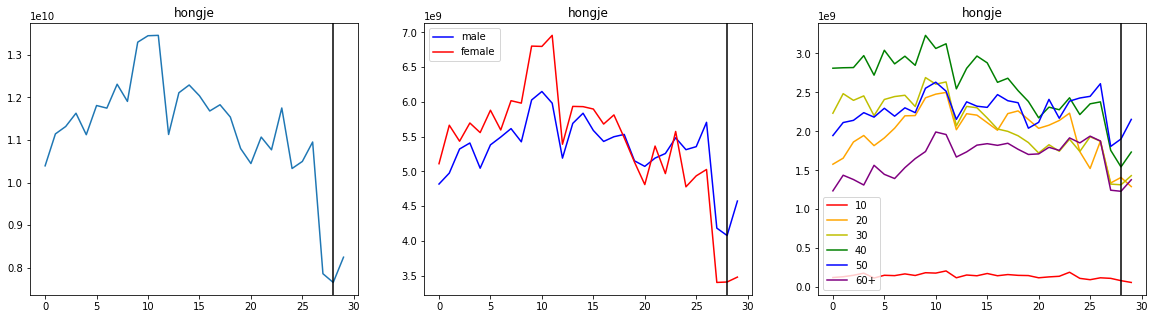

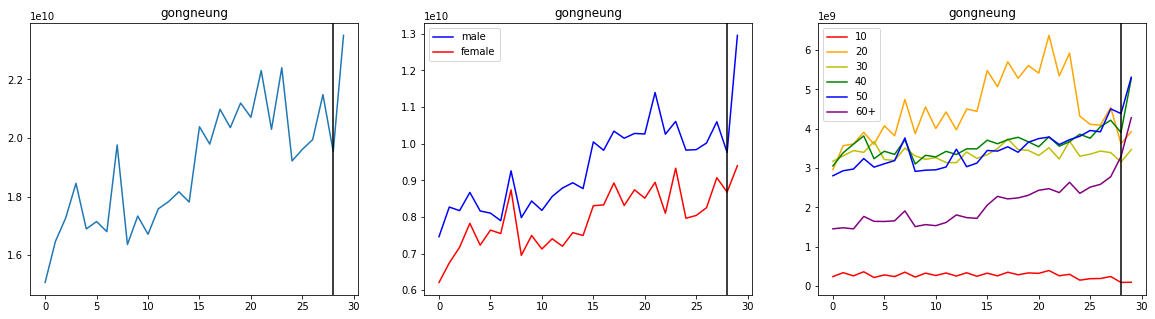

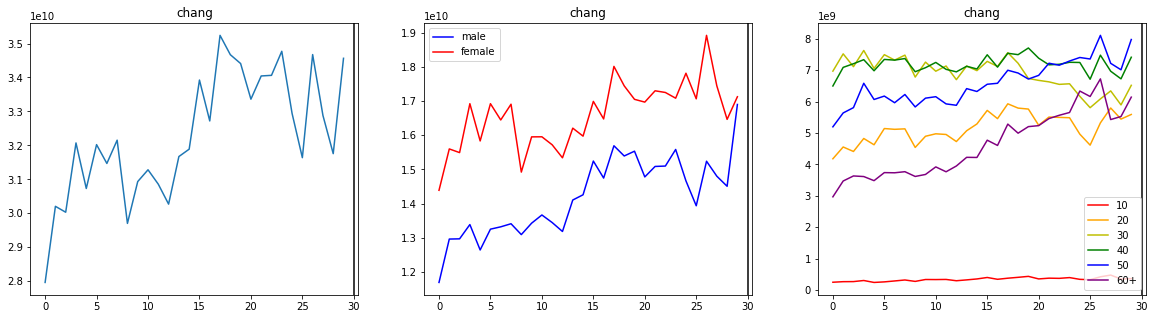

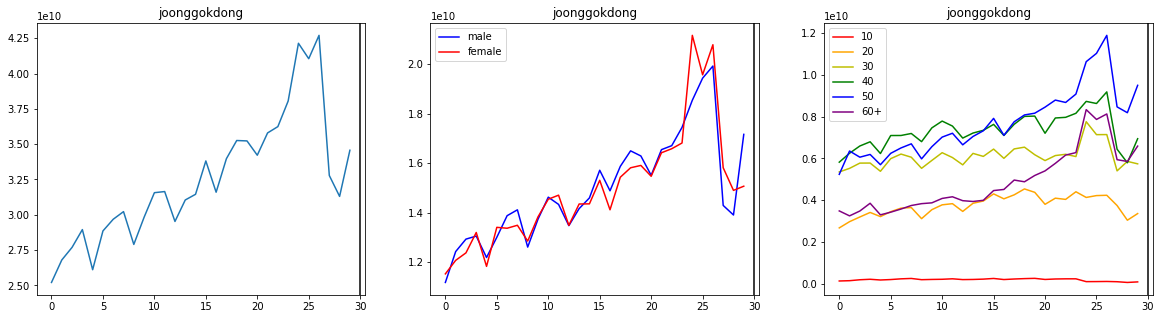

In [20]:
for i in range(8,12):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_amt)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])

  axes[1].plot(temp.ml_selng_amt, label="male", color='b')
  axes[1].plot(temp.fml_selng_amt, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_amt, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_amt, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_amt, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_amt, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_amt, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_amt, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()


# 매출 건수

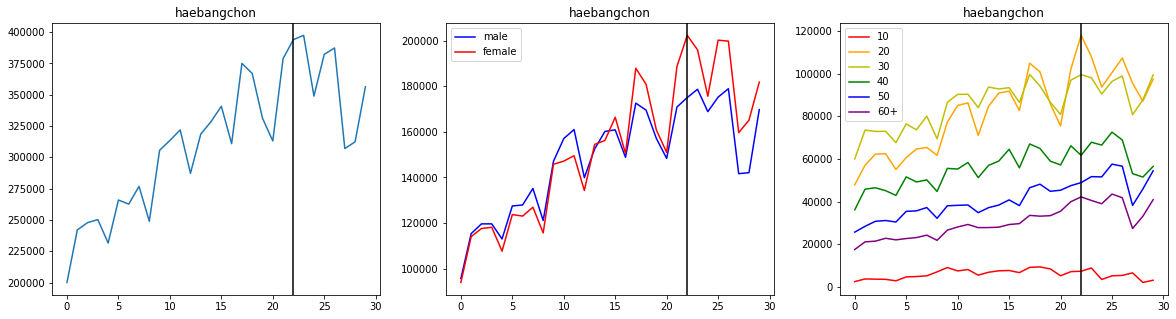

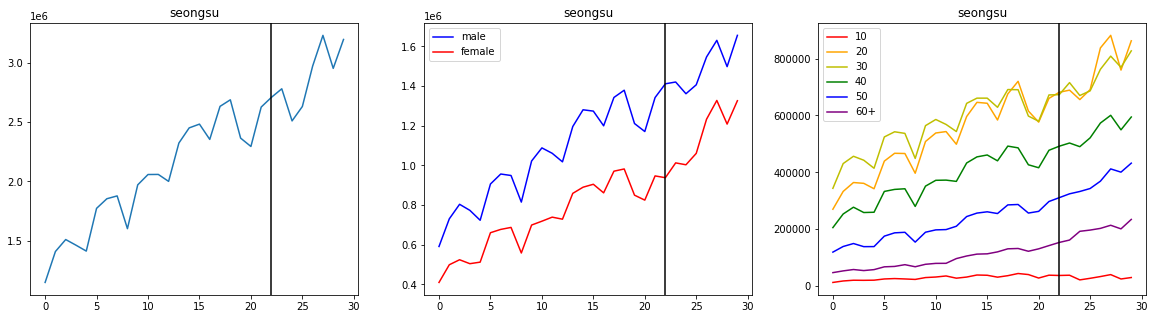

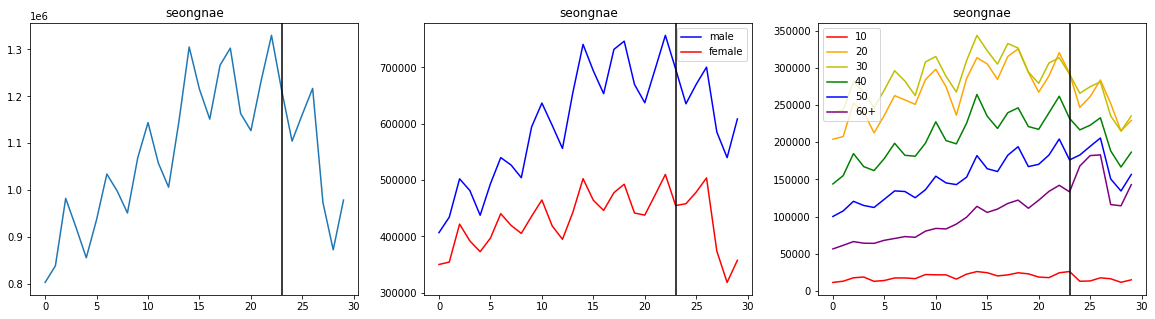

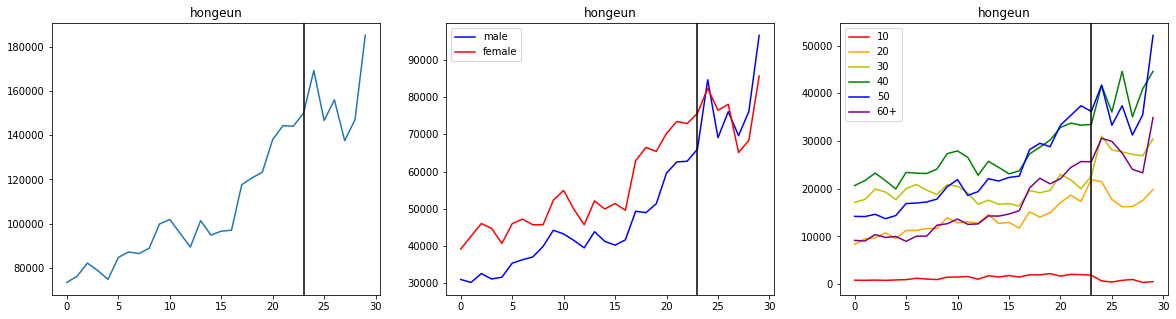

In [21]:
for i in range(4):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_co)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])
  
  axes[1].plot(temp.ml_selng_co, label="male", color='b')
  axes[1].plot(temp.fml_selng_co, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_co, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_co, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_co, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_co, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_co, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_co, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()

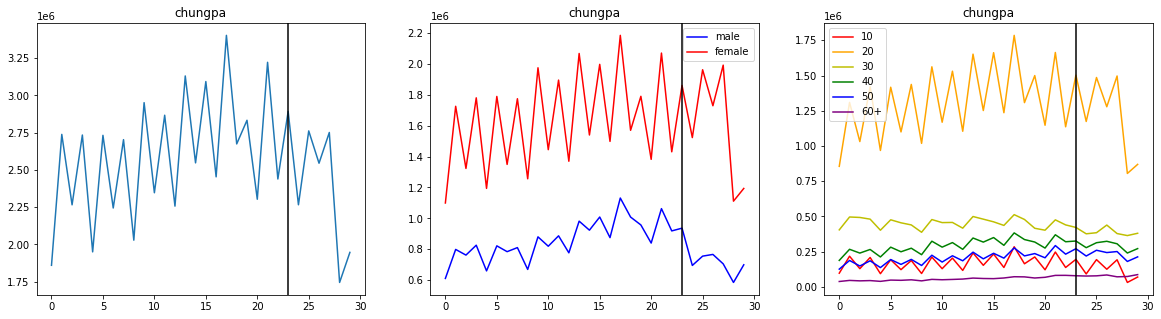

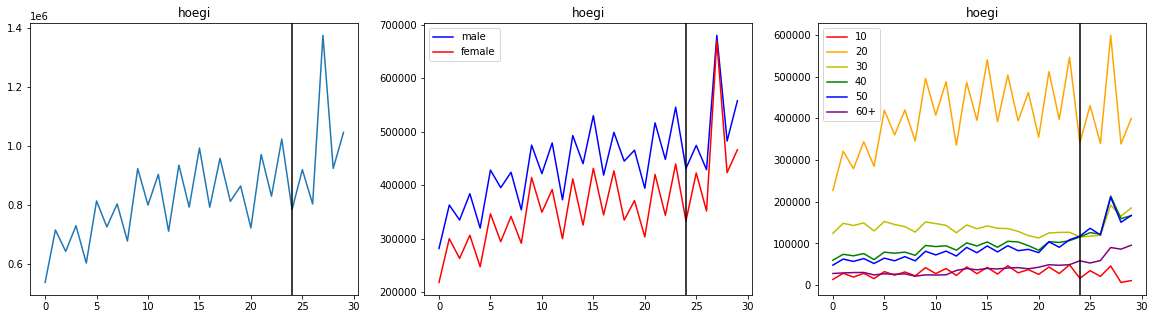

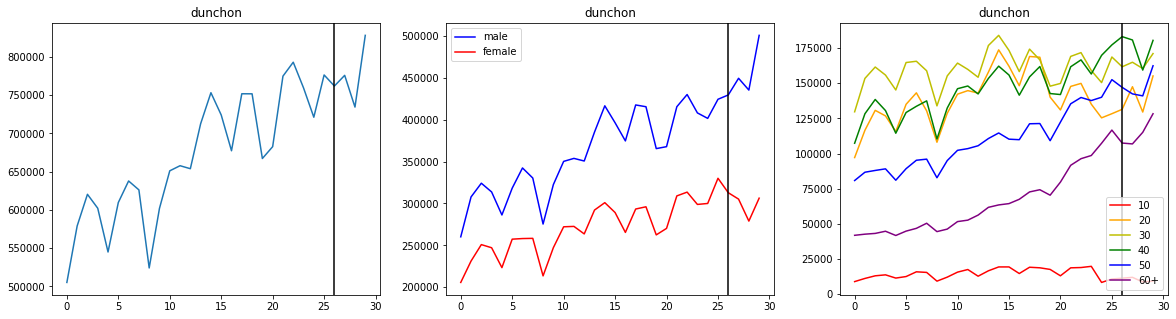

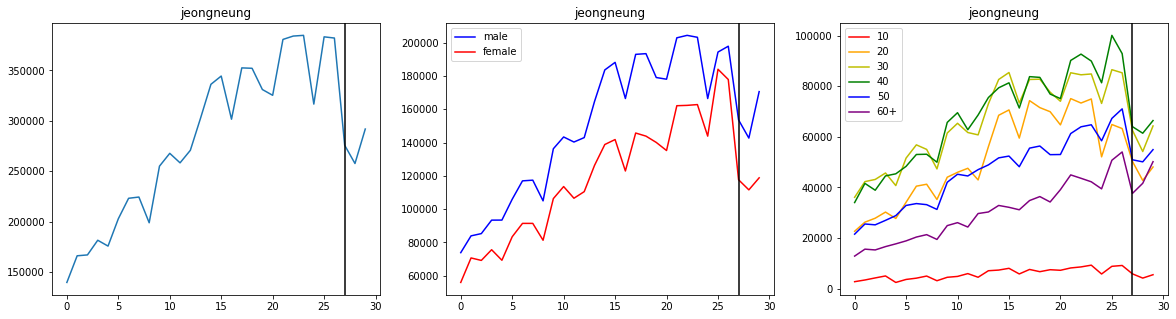

In [22]:
for i in range(4,8):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_co)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])
  
  axes[1].plot(temp.ml_selng_co, label="male", color='b')
  axes[1].plot(temp.fml_selng_co, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_co, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_co, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_co, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_co, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_co, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_co, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()

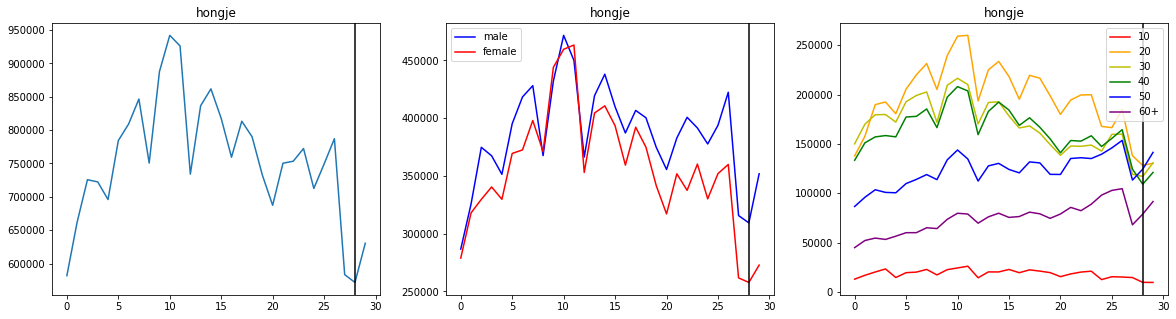

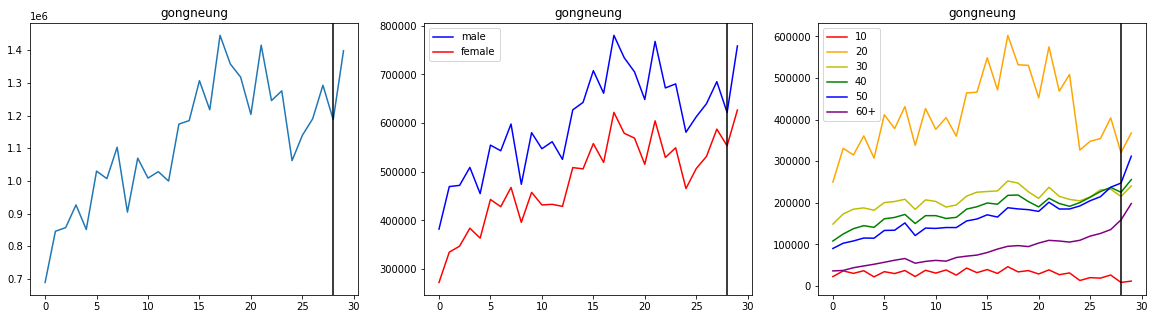

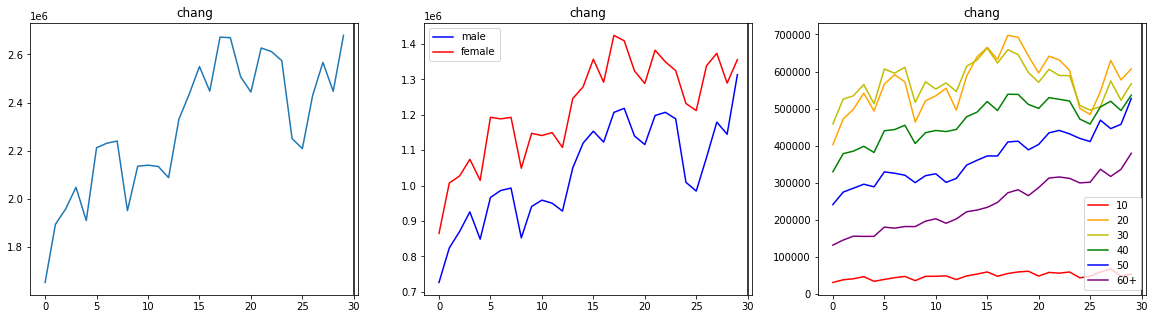

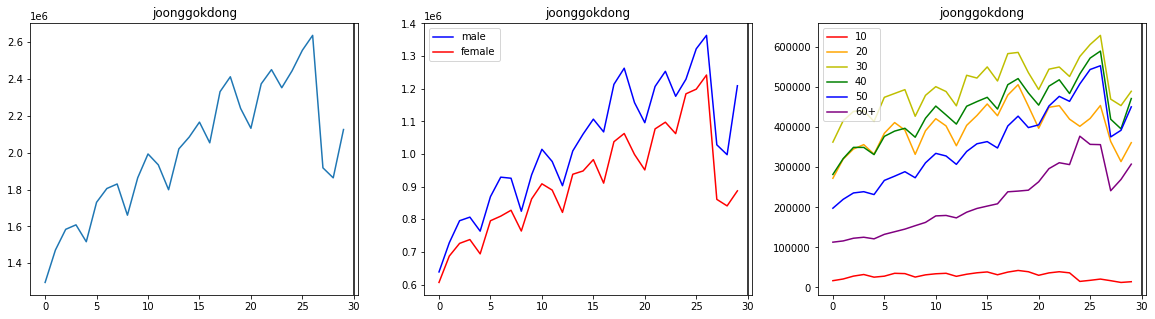

In [23]:
for i in range(8,12):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_co)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])
  
  axes[1].plot(temp.ml_selng_co, label="male", color='b')
  axes[1].plot(temp.fml_selng_co, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_co, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_co, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_co, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_co, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_co, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_co, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()

# 유동인구

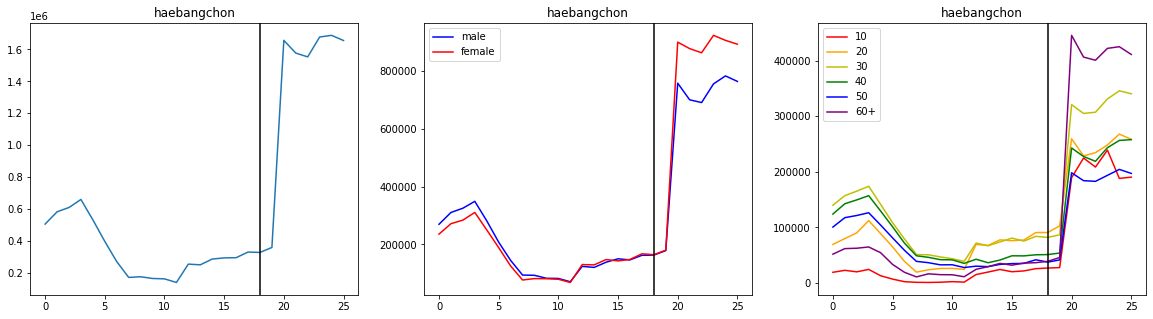

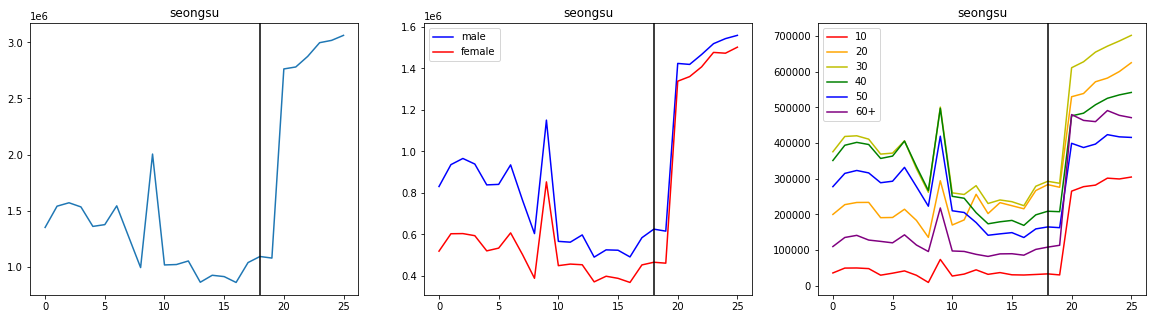

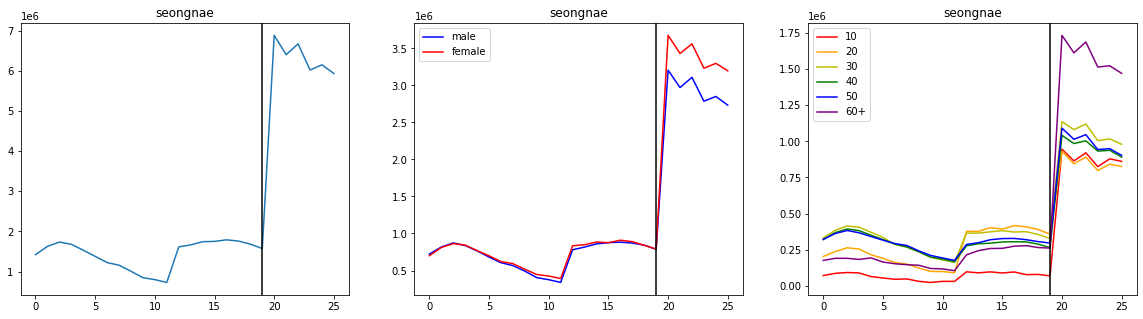

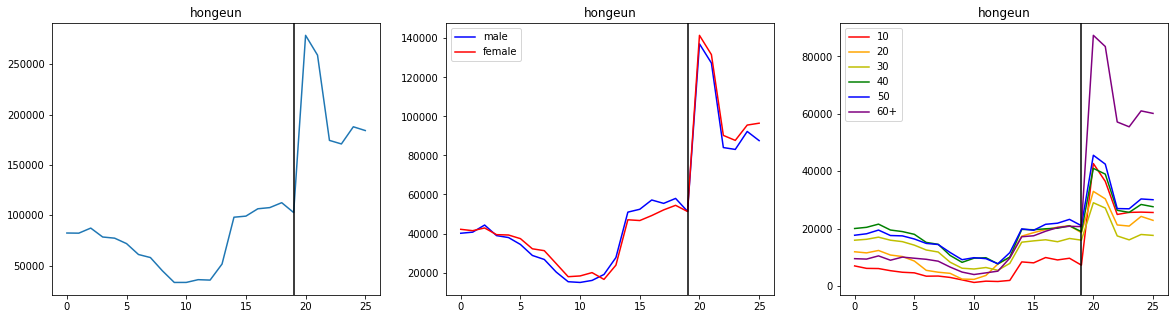

In [24]:
for i in range(4):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = f_pop_data[f_pop_data["area"]==i]
  axes[0].plot(temp.총_유동인구_수)
  axes[0].axvline(bd[i]-4, color='k')
  axes[0].set_title(name[i])
  
  axes[1].plot(temp.남성_유동인구_수, label="male", color='b')
  axes[1].plot(temp.여성_유동인구_수, label="female", color='r')
  axes[1].axvline(bd[i]-4, color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.연령대_10_유동인구_수, label="10", color='r')
  axes[2].plot(temp.연령대_20_유동인구_수, label="20", color='orange')
  axes[2].plot(temp.연령대_30_유동인구_수, label="30", color='y')
  axes[2].plot(temp.연령대_40_유동인구_수, label="40", color='g')
  axes[2].plot(temp.연령대_50_유동인구_수, label="50", color='b')
  axes[2].plot(temp.연령대_60_이상_유동인구_수, label="60+", color='purple')
  axes[2].axvline(bd[i]-4, color='k')
  axes[2].set_title(name[i])
  axes[2].legend()

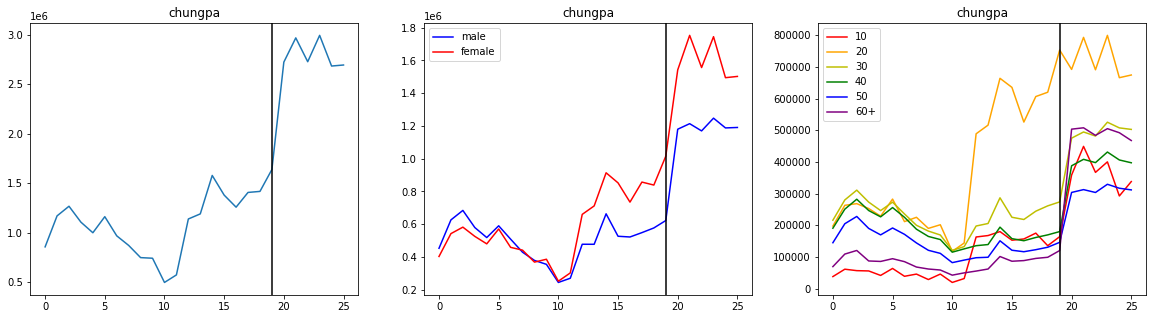

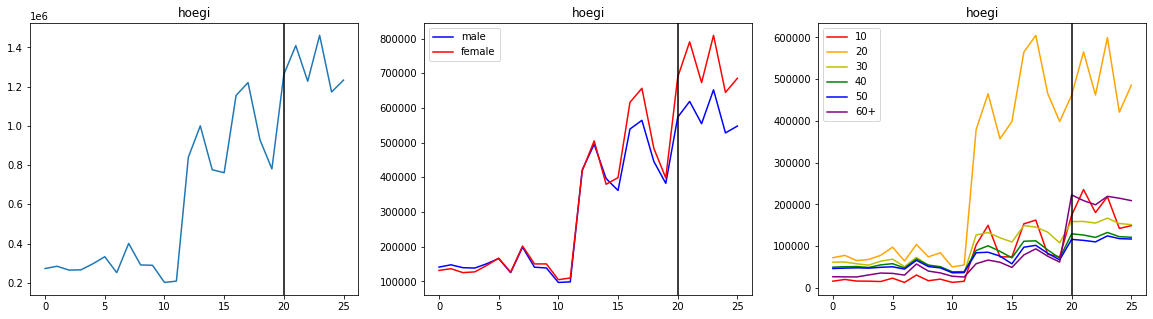

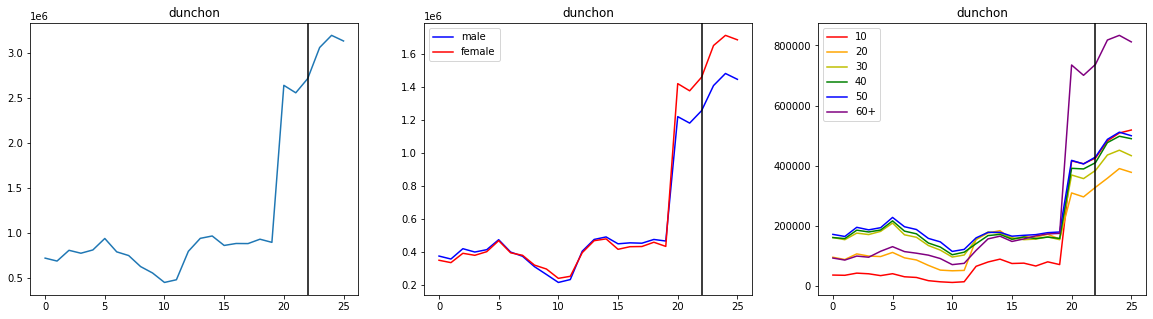

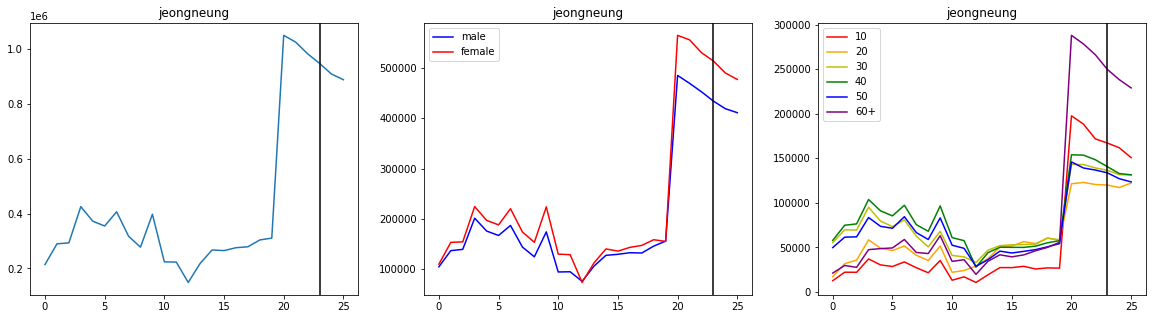

In [25]:
for i in range(4,8):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = f_pop_data[f_pop_data["area"]==i]
  axes[0].plot(temp.총_유동인구_수)
  axes[0].axvline(bd[i]-4, color='k')
  axes[0].set_title(name[i])
  
  axes[1].plot(temp.남성_유동인구_수, label="male", color='b')
  axes[1].plot(temp.여성_유동인구_수, label="female", color='r')
  axes[1].axvline(bd[i]-4, color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.연령대_10_유동인구_수, label="10", color='r')
  axes[2].plot(temp.연령대_20_유동인구_수, label="20", color='orange')
  axes[2].plot(temp.연령대_30_유동인구_수, label="30", color='y')
  axes[2].plot(temp.연령대_40_유동인구_수, label="40", color='g')
  axes[2].plot(temp.연령대_50_유동인구_수, label="50", color='b')
  axes[2].plot(temp.연령대_60_이상_유동인구_수, label="60+", color='purple')
  axes[2].axvline(bd[i]-4, color='k')
  axes[2].set_title(name[i])
  axes[2].legend()

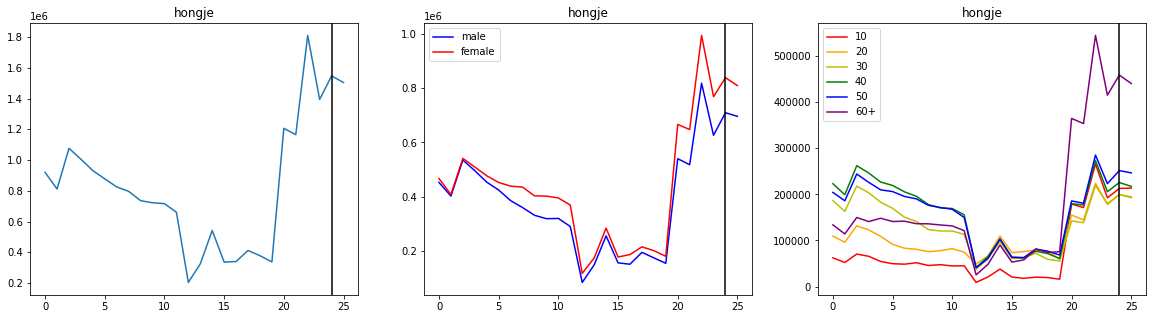

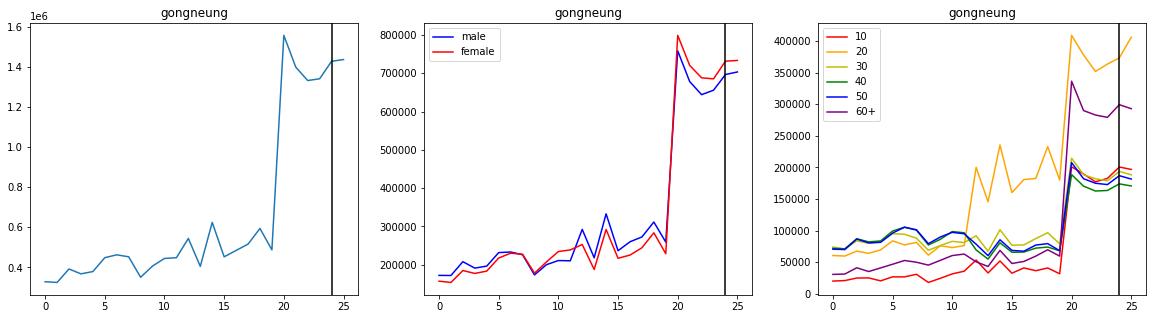

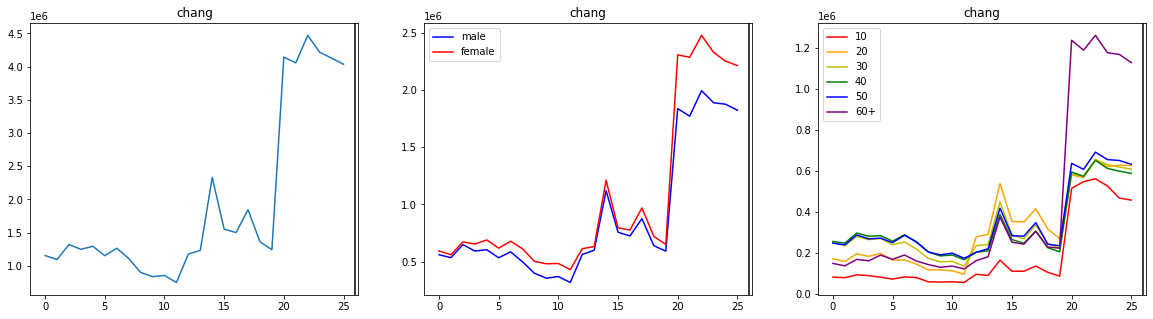

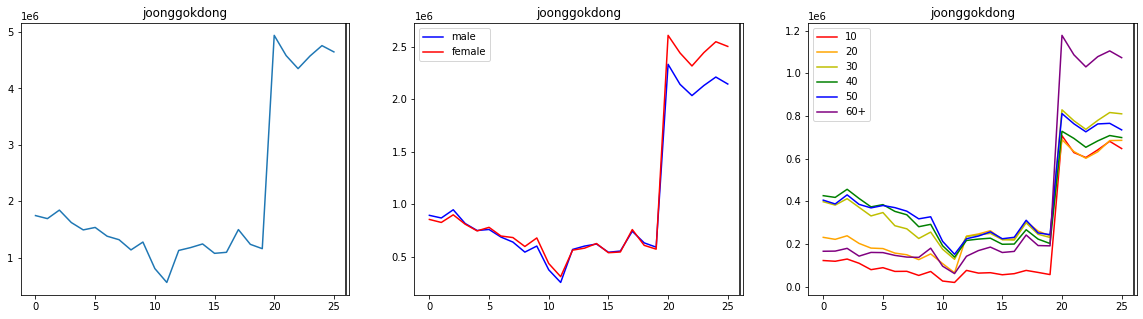

In [26]:
for i in range(8,12):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = f_pop_data[f_pop_data["area"]==i]
  axes[0].plot(temp.총_유동인구_수)
  axes[0].axvline(bd[i]-4, color='k')
  axes[0].set_title(name[i])
  
  axes[1].plot(temp.남성_유동인구_수, label="male", color='b')
  axes[1].plot(temp.여성_유동인구_수, label="female", color='r')
  axes[1].axvline(bd[i]-4, color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.연령대_10_유동인구_수, label="10", color='r')
  axes[2].plot(temp.연령대_20_유동인구_수, label="20", color='orange')
  axes[2].plot(temp.연령대_30_유동인구_수, label="30", color='y')
  axes[2].plot(temp.연령대_40_유동인구_수, label="40", color='g')
  axes[2].plot(temp.연령대_50_유동인구_수, label="50", color='b')
  axes[2].plot(temp.연령대_60_이상_유동인구_수, label="60+", color='purple')
  axes[2].axvline(bd[i]-4, color='k')
  axes[2].set_title(name[i])
  axes[2].legend()